# ML Packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from sklearn.metrics import auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import mysql.connector
from mysql.connector import Error

# Importing the dataset from Database

In [2]:
db = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="employee_churn"
)

cursor = db.cursor()

table = "turnover_employees"
query = "SELECT * FROM " + table

try:
    cursor.execute(query)
    columns = [desc[0] for desc in cursor.description]
    rows = cursor.fetchall()
    initial_dataset = pd.DataFrame(rows, columns=columns)
    dataset = initial_dataset.copy()
    display(dataset)

except Error as err:
    print("Error while loading data from Database : ", err)

cursor.close()
db.close()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.03080,1,m,35,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.96510,1,m,33,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.93430,1,f,35,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.93430,1,f,35,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.41068,1,m,32,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.61190,0,f,41,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.61190,0,f,41,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.80100,0,f,34,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.41270,0,f,51,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


# Dataset Deatils

In [3]:
print("Dataset shape : ", dataset.shape)
print("Number of rows : ", dataset.shape[0])
print("Number of columns : ", dataset.shape[1])
print("Description : \n", dataset.describe)

Dataset shape :  (1129, 16)
Number of rows :  1129
Number of columns :  16
Description : 
 <bound method NDFrame.describe of            stag  event gender  age         industry  profession      traffic  \
0       7.03080      1      m   35            Banks          HR  rabrecNErab   
1      22.96510      1      m   33            Banks          HR        empjs   
2      15.93430      1      f   35  PowerGeneration          HR  rabrecNErab   
3      15.93430      1      f   35  PowerGeneration          HR  rabrecNErab   
4       8.41068      1      m   32           Retail  Commercial        youjs   
...         ...    ...    ...  ...              ...         ...          ...   
1124   10.61190      0      f   41            Banks          HR  rabrecNErab   
1125   10.61190      0      f   41            Banks          HR  rabrecNErab   
1126  118.80100      0      f   34          Telecom  Accounting           KA   
1127   49.41270      0      f   51          Consult          HR        empj

# Null Values Handeling

In [4]:
print("Dropping rows with more than 50% null columns...\n")
print("Initial number of rows : ", dataset.shape[0])
dataset = dataset.dropna(thresh=dataset.shape[1] * 0.5)
print("Number of rows after dropping : ", dataset.shape[0])

Dropping rows with more than 50% null columns...

Initial number of rows :  1129
Number of rows after dropping :  1129


In [5]:
# Replace null values with Mode (most frequently occuring values)
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
col_indicies = dataset.columns.get_indexer(dataset.columns)
imputer.fit(dataset.iloc[:, col_indicies])
dataset.iloc[:, col_indicies] = imputer.transform(dataset.iloc[:, col_indicies])
print("Simple Imputer statistics : ", imputer.statistics_)
print(imputer.statistics_)
display(dataset)

Simple Imputer statistics :  [3.97536 1 'f' 26 'Retail' 'HR' 'youjs' 'no' 'm' 'white' 'bus' 6.2 5.5 4.1
 5.6 6.7]
[3.97536 1 'f' 26 'Retail' 'HR' 'youjs' 'no' 'm' 'white' 'bus' 6.2 5.5 4.1
 5.6 6.7]


,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.03080,1,m,35,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.96510,1,m,33,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.93430,1,f,35,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.93430,1,f,35,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.41068,1,m,32,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.61190,0,f,41,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.61190,0,f,41,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.80100,0,f,34,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.41270,0,f,51,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


# String or Categorical Data Handeling


In [6]:
def labelEncoding(encodeObject, dataset, column):
    encodeObject = LabelEncoder()
    dataset[column] = encodeObject.fit_transform(dataset[column])
    print()
    print("Map of Encoded Values of", column, ":")
    for i in range(len(encodeObject.classes_)):
        print(i, "->", encodeObject.classes_[i])


# Gender Encoder
genderObj = None
labelEncoding(genderObj, dataset, "gender")

# Industry Encoder
industryObj = None
labelEncoding(industryObj, dataset, "industry")

# Profession Encoder
professionObj = None
labelEncoding(professionObj, dataset, "profession")

# Traffic Encoder
trafficObj = None
labelEncoding(trafficObj, dataset, "traffic")

# Coach Encoder
coachObj = None
labelEncoding(coachObj, dataset, "coach")

# Head Gender Encoder
headGenderObj = None
labelEncoding(headGenderObj, dataset, "head_gender")

# Greywage Encoder
greywageObj = None
labelEncoding(greywageObj, dataset, "greywage")

# Way Encoder
wayObj = None
labelEncoding(wayObj, dataset, "way")

# Extraversion Encoder
extraversionObj = None
labelEncoding(extraversionObj, dataset, "extraversion")

# Independ Encoder
independObj = None
labelEncoding(independObj, dataset, "independ")

# Selfcontrol Encoder
selfcontrolObj = None
labelEncoding(selfcontrolObj, dataset, "selfcontrol")

# Anxiety Encoder
anxietyObj = None
labelEncoding(anxietyObj, dataset, "anxiety")

# Novator Encoder
novatorObj = None
labelEncoding(novatorObj, dataset, "novator")

display(dataset)


Map of Encoded Values of gender :
0 -> f
1 -> m

Map of Encoded Values of industry :
0 ->  HoReCa
1 -> Agriculture
2 -> Banks
3 -> Building
4 -> Consult
5 -> IT
6 -> Mining
7 -> Pharma
8 -> PowerGeneration
9 -> RealEstate
10 -> Retail
11 -> State
12 -> Telecom
13 -> etc
14 -> manufacture
15 -> transport

Map of Encoded Values of profession :
0 -> Accounting
1 -> BusinessDevelopment
2 -> Commercial
3 -> Consult
4 -> Engineer
5 -> Finanñe
6 -> HR
7 -> IT
8 -> Law
9 -> Marketing
10 -> PR
11 -> Sales
12 -> Teaching
13 -> etc
14 -> manage

Map of Encoded Values of traffic :
0 -> KA
1 -> advert
2 -> empjs
3 -> friends
4 -> rabrecNErab
5 -> recNErab
6 -> referal
7 -> youjs

Map of Encoded Values of coach :
0 -> my head
1 -> no
2 -> yes

Map of Encoded Values of head_gender :
0 -> f
1 -> m

Map of Encoded Values of greywage :
0 -> grey
1 -> white

Map of Encoded Values of way :
0 -> bus
1 -> car
2 -> foot

Map of Encoded Values of extraversion :
0 -> 1.0
1 -> 1.4
2 -> 2.2
3 -> 3.0
4 -> 3.8
5 

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.03080,1,1,35,2,6,4,1,0,1,0,7,5,6,7,10
1,22.96510,1,1,33,2,6,2,1,1,1,0,7,5,6,7,10
2,15.93430,1,0,35,8,6,4,1,1,1,0,7,8,2,4,10
3,15.93430,1,0,35,8,6,4,1,1,1,0,6,10,5,1,8
4,8.41068,1,1,32,10,2,7,2,0,1,0,3,5,9,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.61190,0,0,41,2,6,4,0,1,1,0,10,4,2,4,10
1125,10.61190,0,0,41,2,6,4,0,1,1,0,10,4,2,4,10
1126,118.80100,0,0,34,12,0,0,1,0,1,0,5,7,8,6,4
1127,49.41270,0,0,51,4,6,2,1,1,0,0,4,10,6,6,6


Detcting Outliers : 

Outliers in stag : 
7       120.444
108     123.335
109     123.335
141     150.998
148     142.456
162     128.066
172     130.990
197     166.275
223     138.940
250     139.072
254     160.066
262     123.072
291     150.144
327     140.945
328     140.945
356     155.170
366     164.567
374     115.548
379     133.914
380     133.914
394     129.807
408     133.881
409     133.881
509     149.618
515     129.281
561     133.421
568     163.811
583     114.136
641     179.450
653     144.756
674     163.778
675     163.778
698     144.591
709     116.731
715     131.614
729     140.222
749     128.131
782     123.696
786     155.368
899     113.840
900     113.840
925     132.895
926     132.895
960     166.078
974     112.788
983     142.752
1005    113.051
1025    114.858
1057    118.899
1082    132.402
1109    153.101
1126    118.801
Name: stag, dtype: float64

Outliers in event : 
Series([], Name: event, dtype: int64)

Outliers in gender : 
0       1
1     

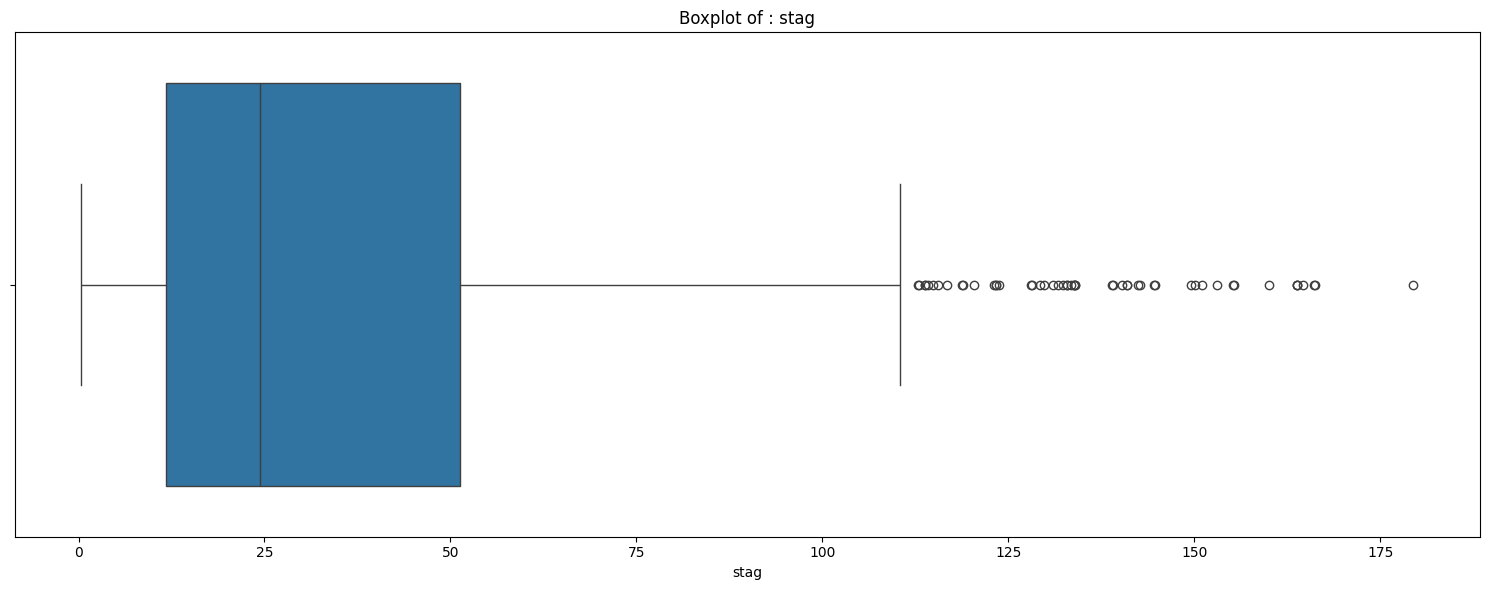

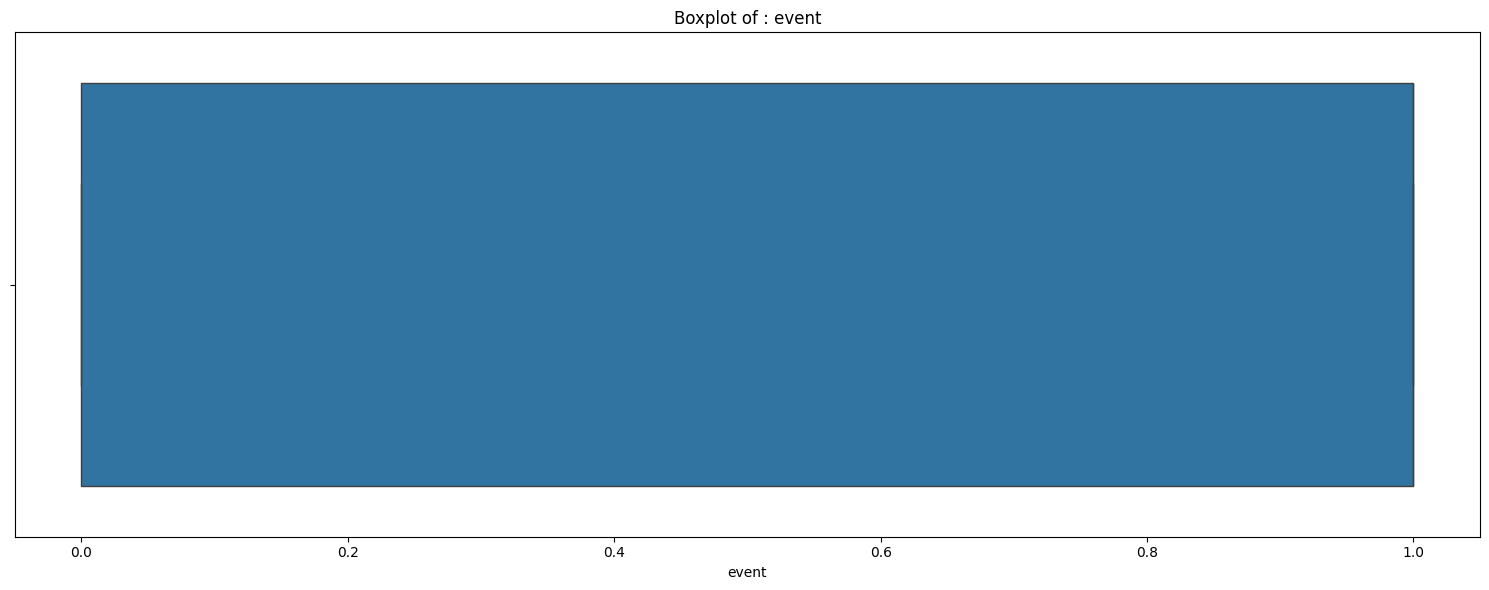

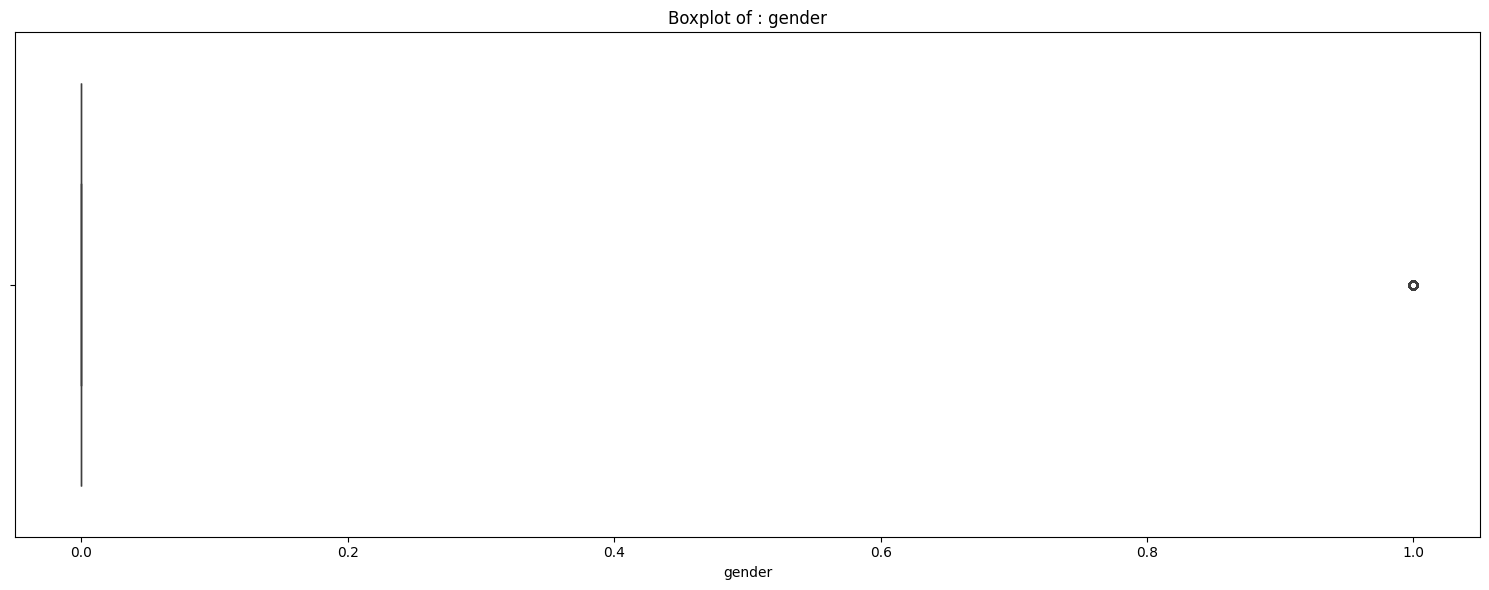

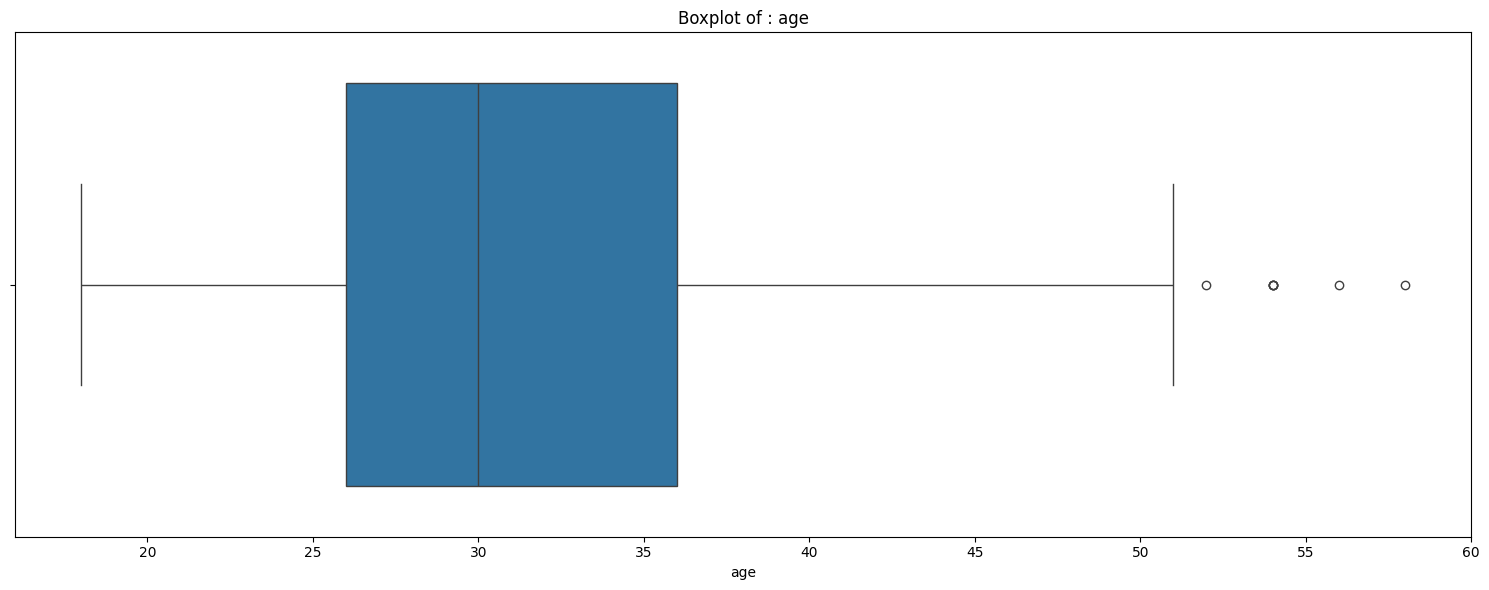

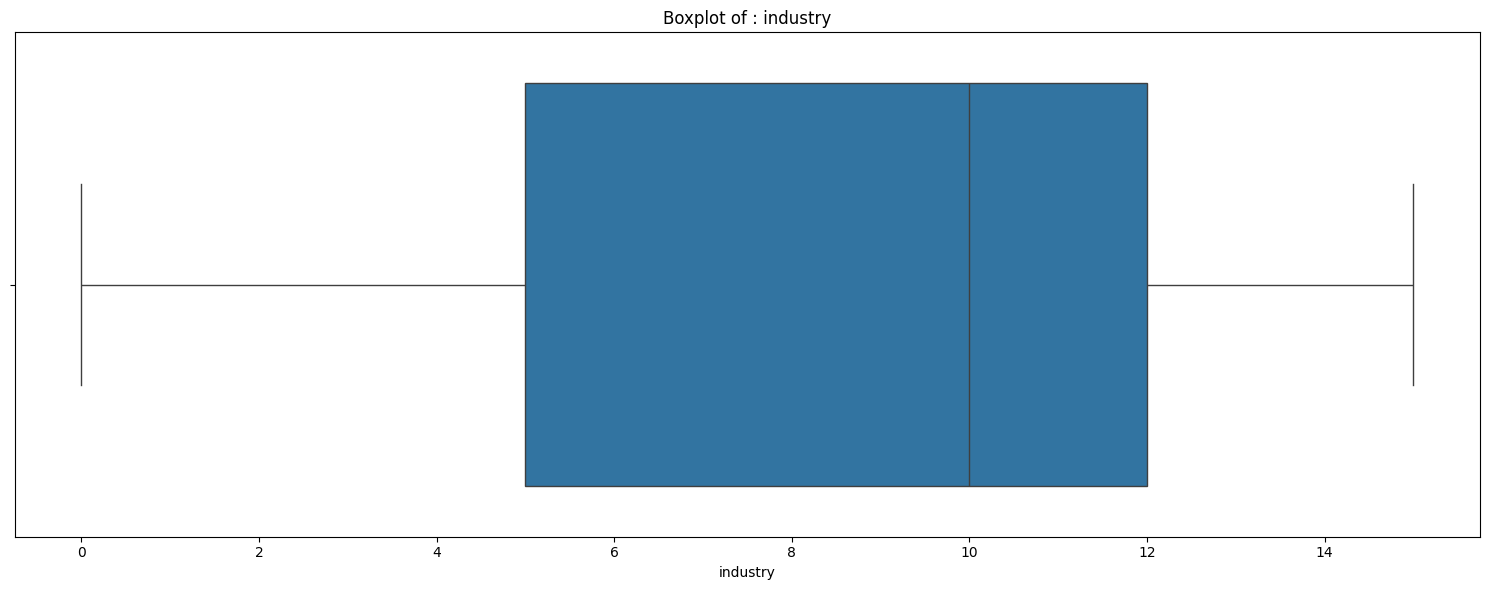

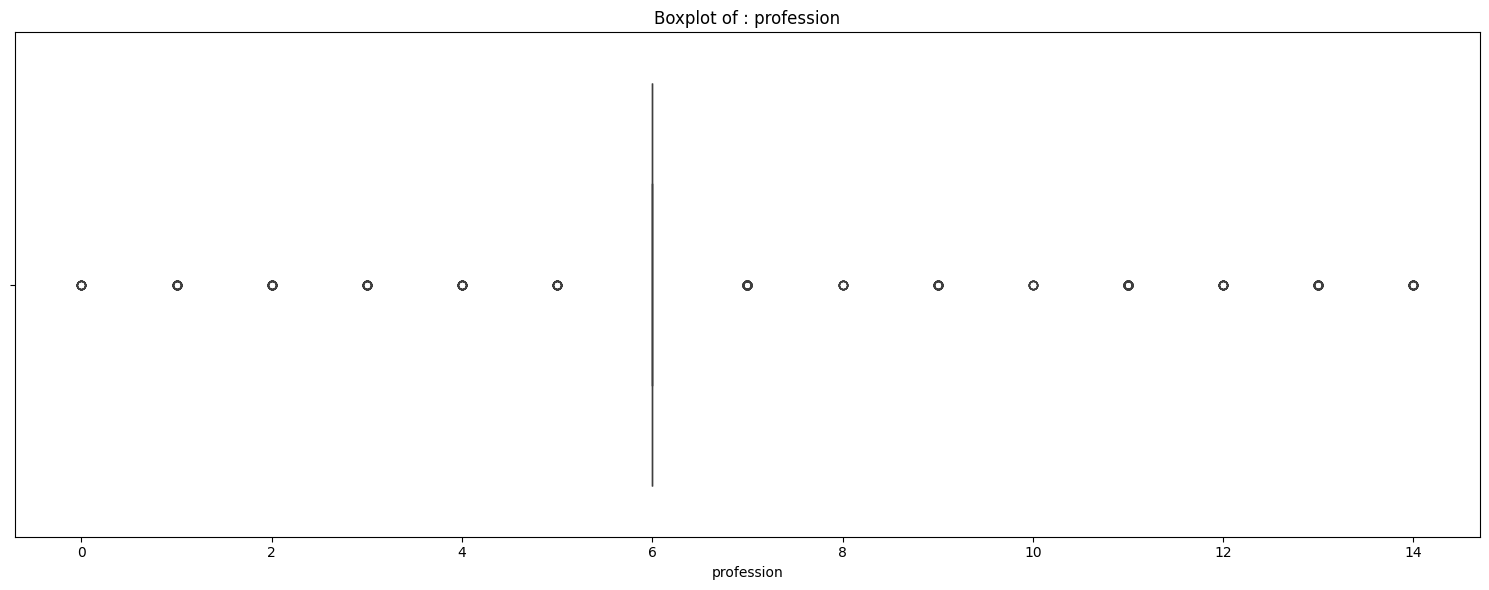

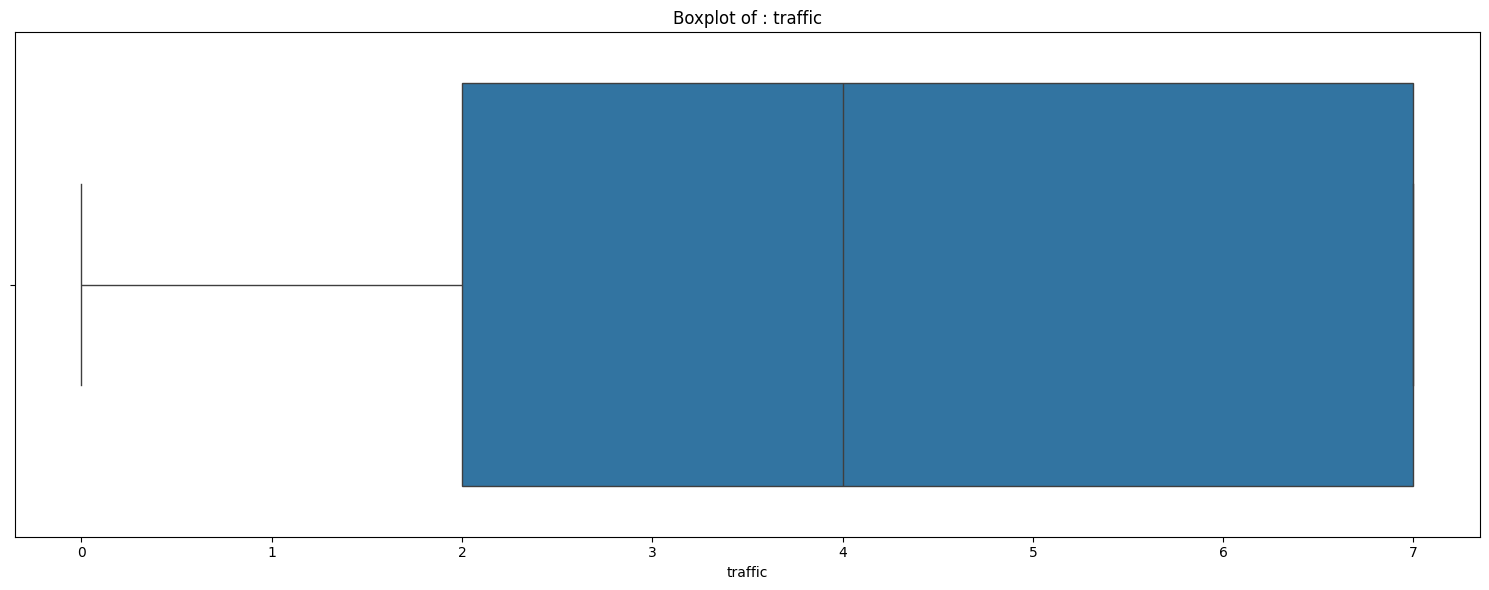

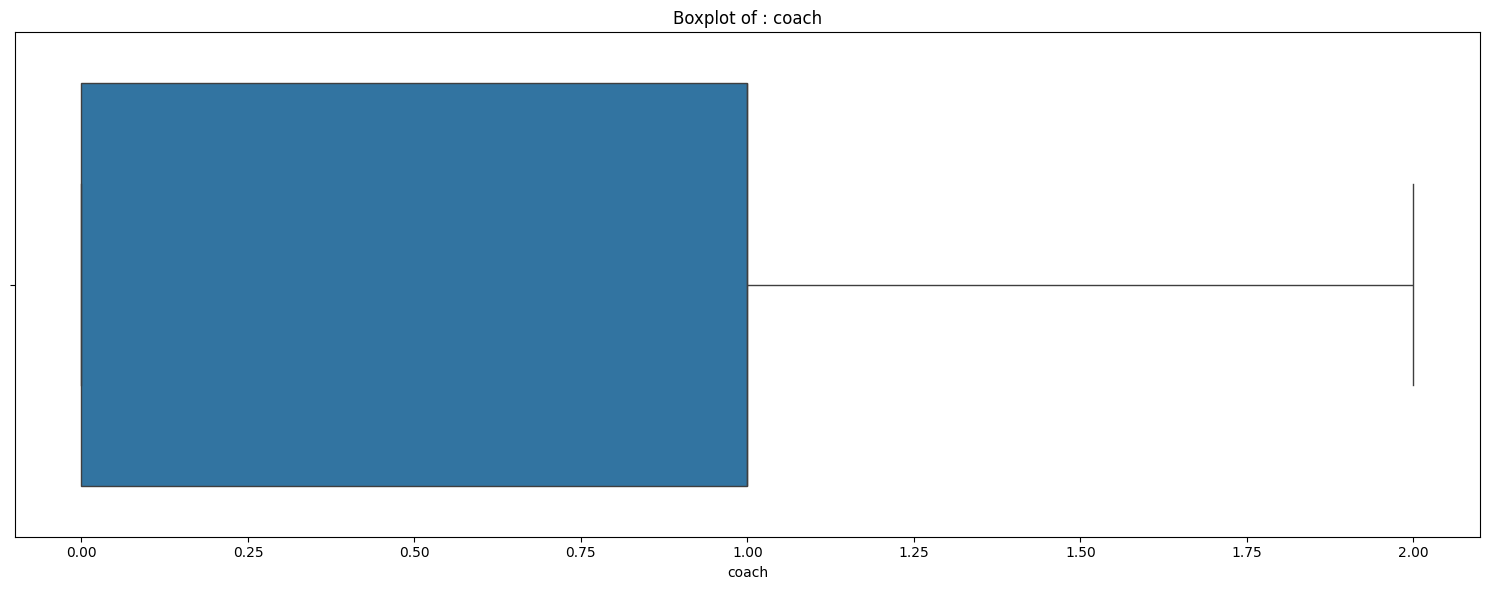

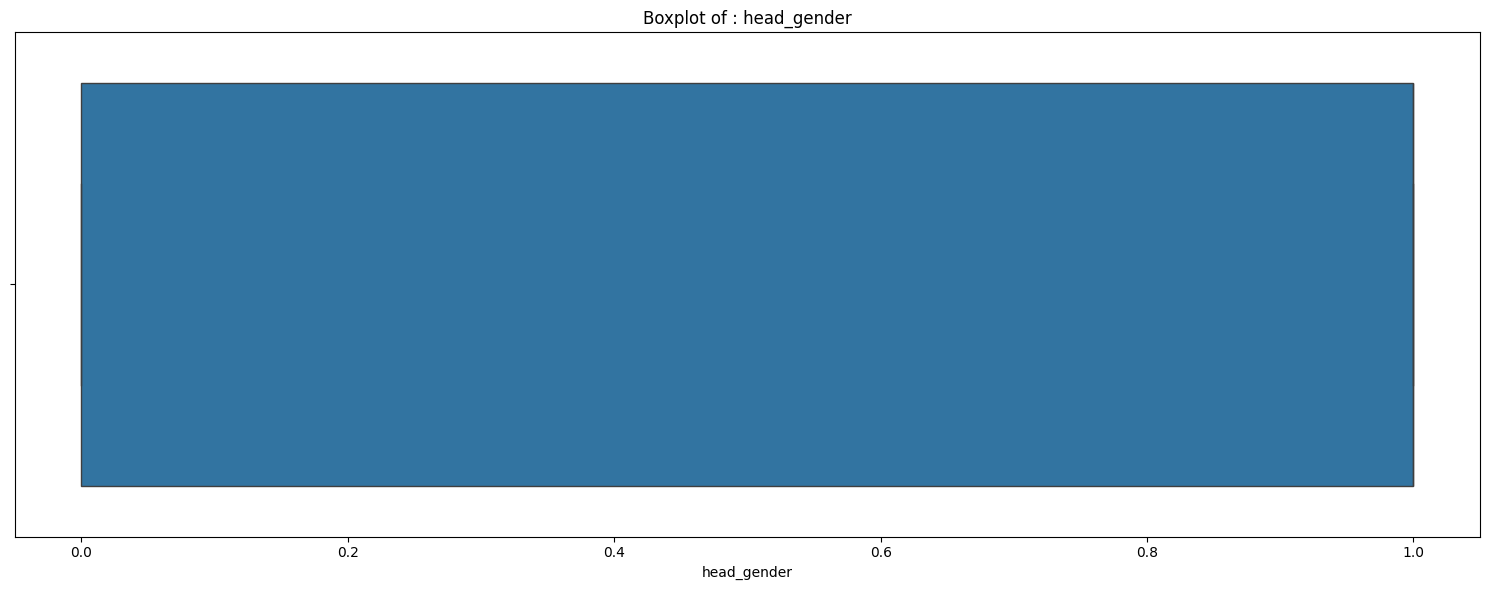

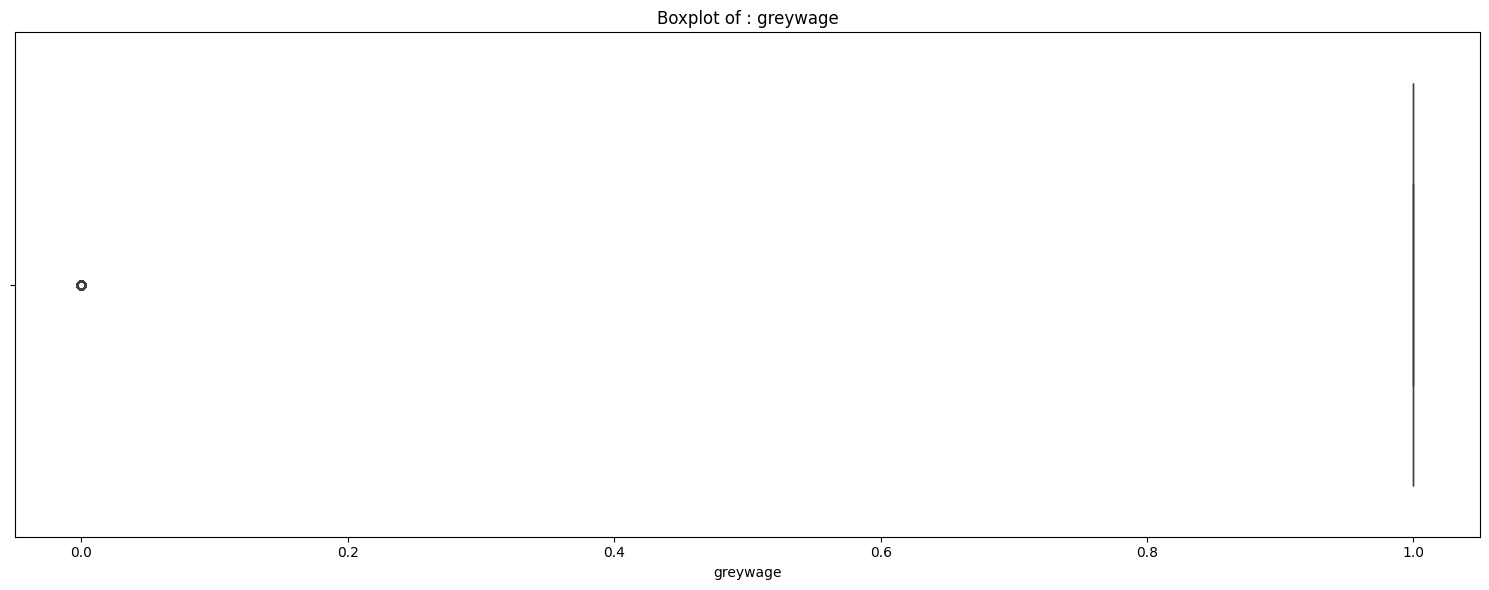

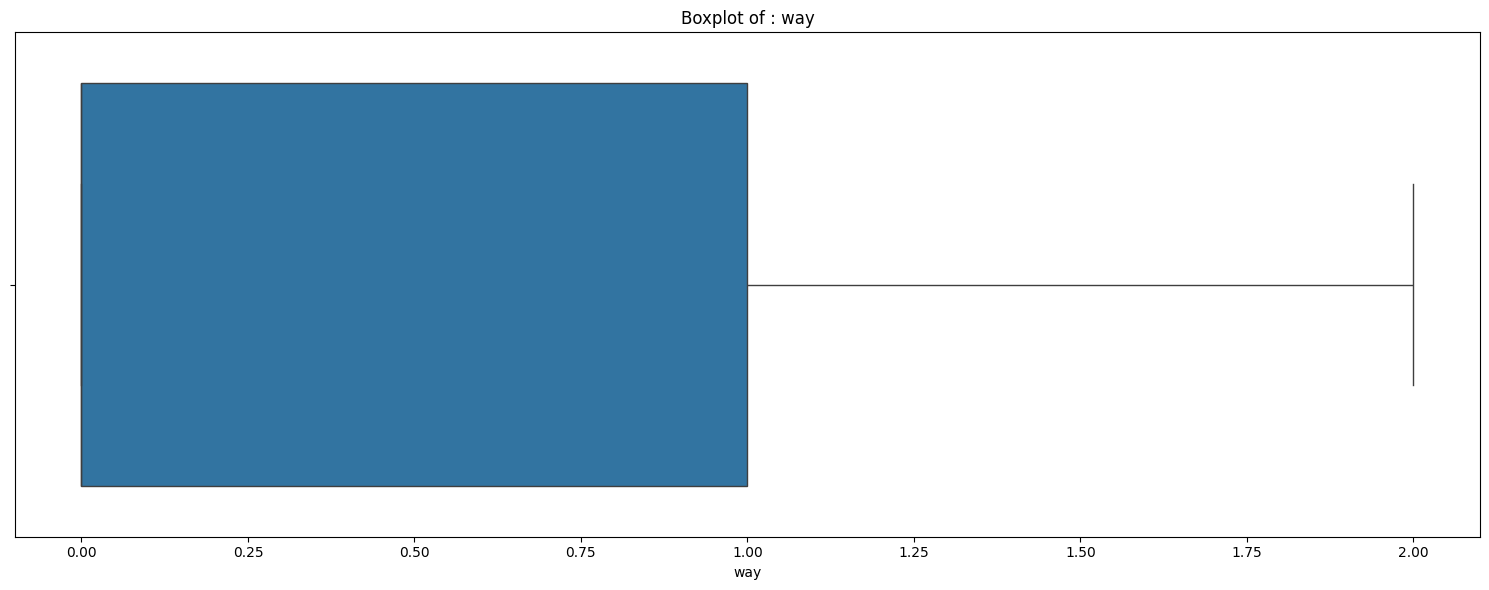

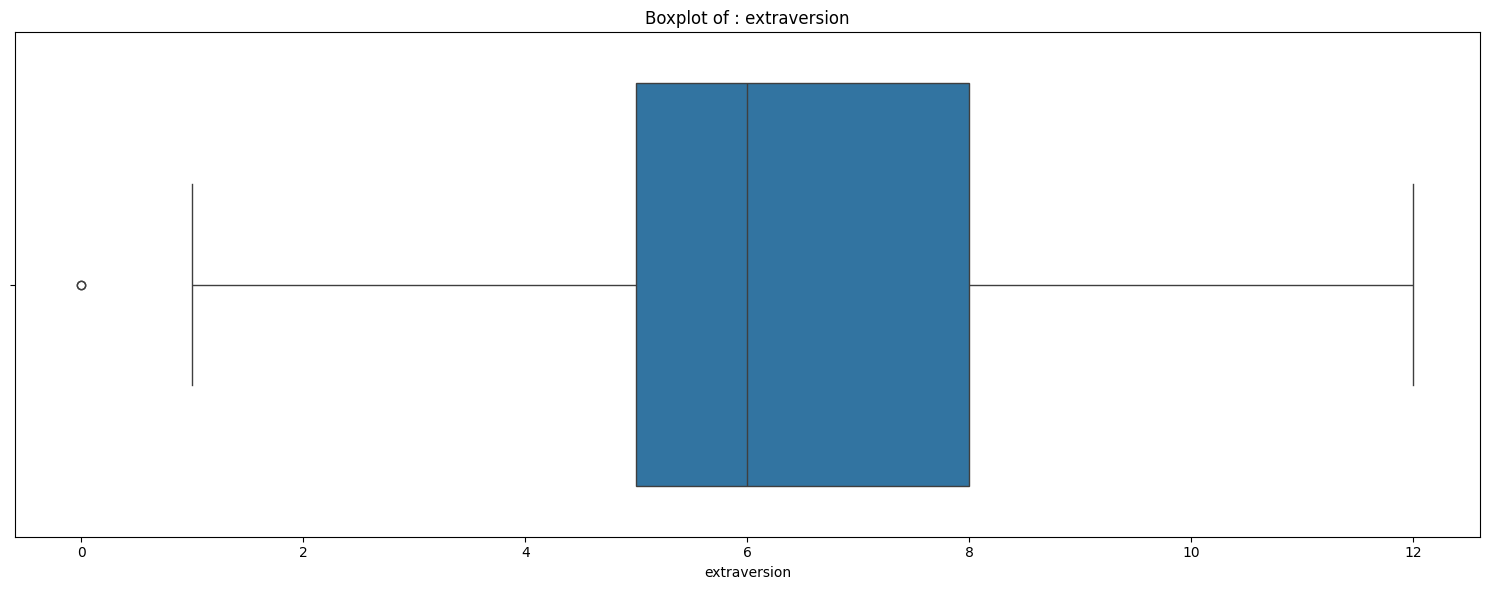

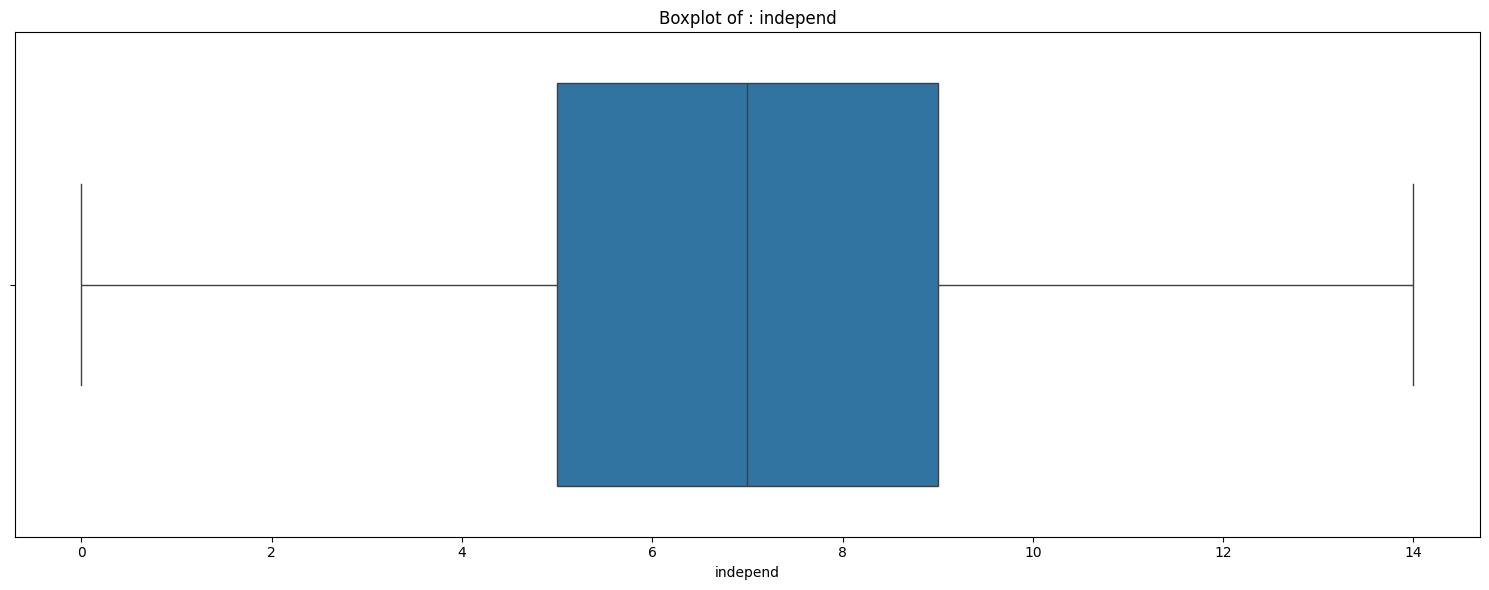

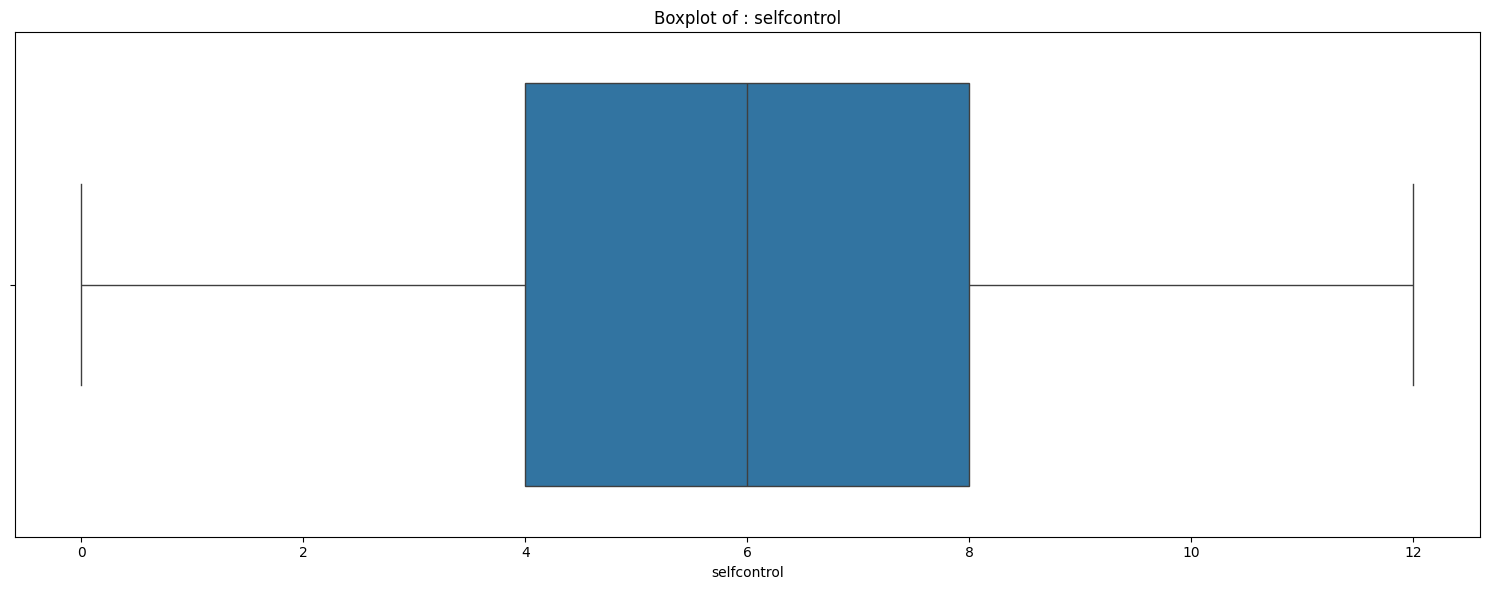

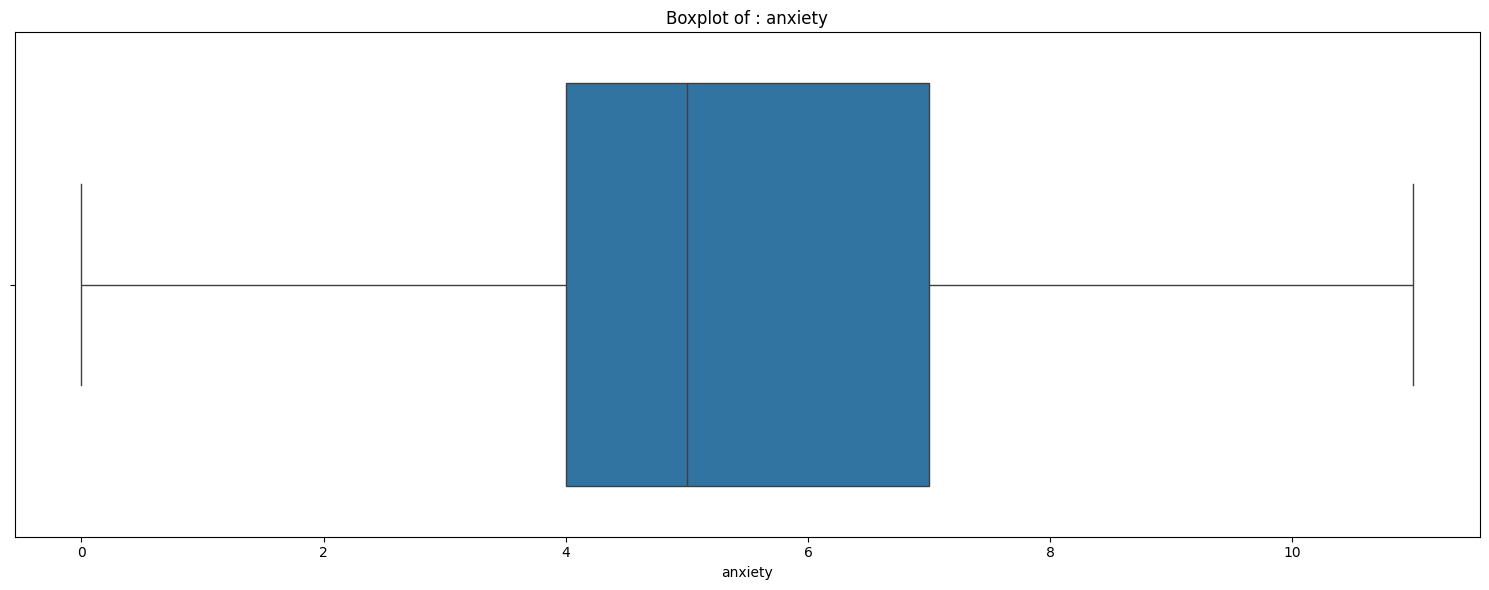

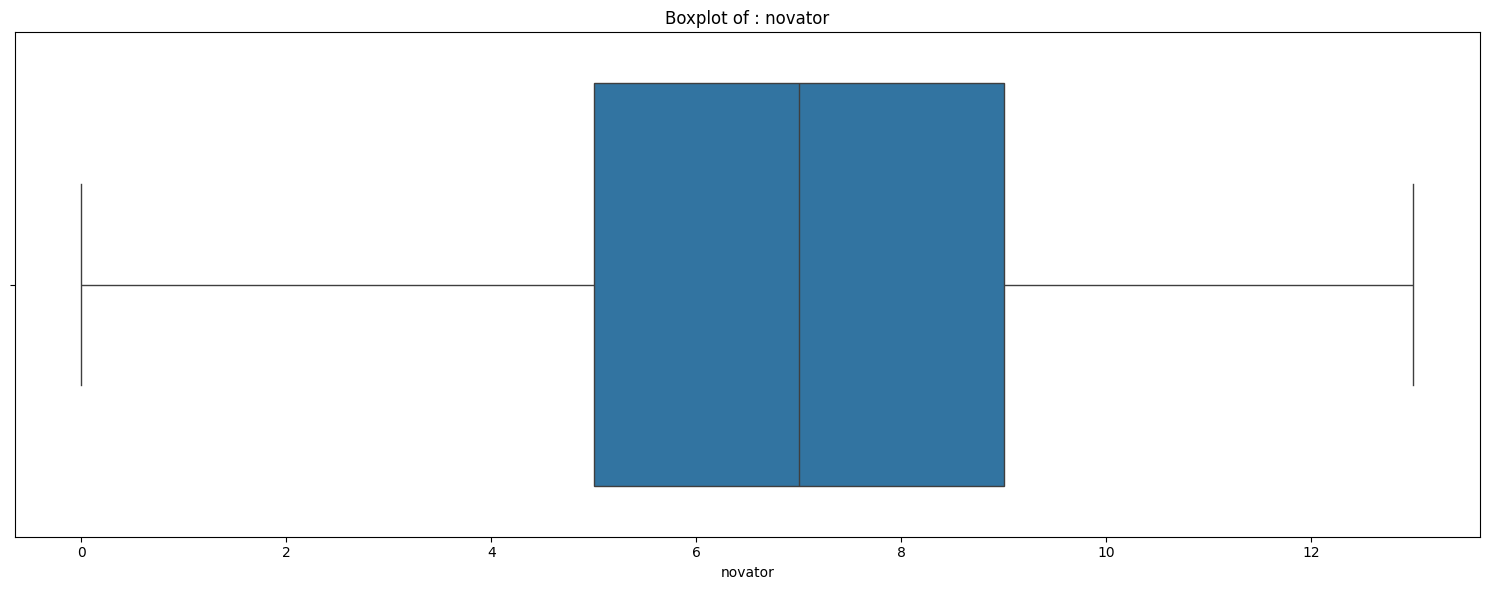

In [7]:
# Outlier Detection
print("Detcting Outliers : \n")
outliers_dict = {}

for col in dataset.columns:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    specificColumnData = dataset[col]
    outliers = specificColumnData[
        (dataset[col] < lower_bound) | (dataset[col] > upper_bound)
    ]
    outliers_dict[col] = outliers

for col in outliers_dict:
    print("Outliers in " + col + " : \n" + str(outliers_dict[col]))
    print()

for col in dataset.columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=dataset[col], orient="h")
    plt.title("Boxplot of : " + col)
    plt.tight_layout()
    plt.show()

# Correlation Matrix

                  stag     event    gender       age  industry  profession  \
stag          1.000000 -0.048361  0.042269 -0.197390  0.071454   -0.051548   
event        -0.048361  1.000000 -0.018917 -0.048996 -0.064898    0.033031   
gender        0.042269 -0.018917  1.000000  0.055816 -0.018343    0.069097   
age          -0.197390 -0.048996  0.055816  1.000000  0.094374   -0.120218   
industry      0.071454 -0.064898 -0.018343  0.094374  1.000000    0.038143   
profession   -0.051548  0.033031  0.069097 -0.120218  0.038143    1.000000   
traffic       0.008434 -0.015078 -0.027809 -0.112998  0.007050   -0.061871   
coach        -0.014459  0.064296  0.011848  0.047035 -0.056557   -0.017381   
head_gender  -0.006827  0.041259  0.211305  0.197888  0.002100    0.003221   
greywage      0.120718 -0.049166  0.019874 -0.028420 -0.042358   -0.018734   
way           0.074214 -0.067470  0.063631  0.060866  0.032720    0.065788   
extraversion -0.088600  0.015210 -0.146270 -0.149745 -0.028031  

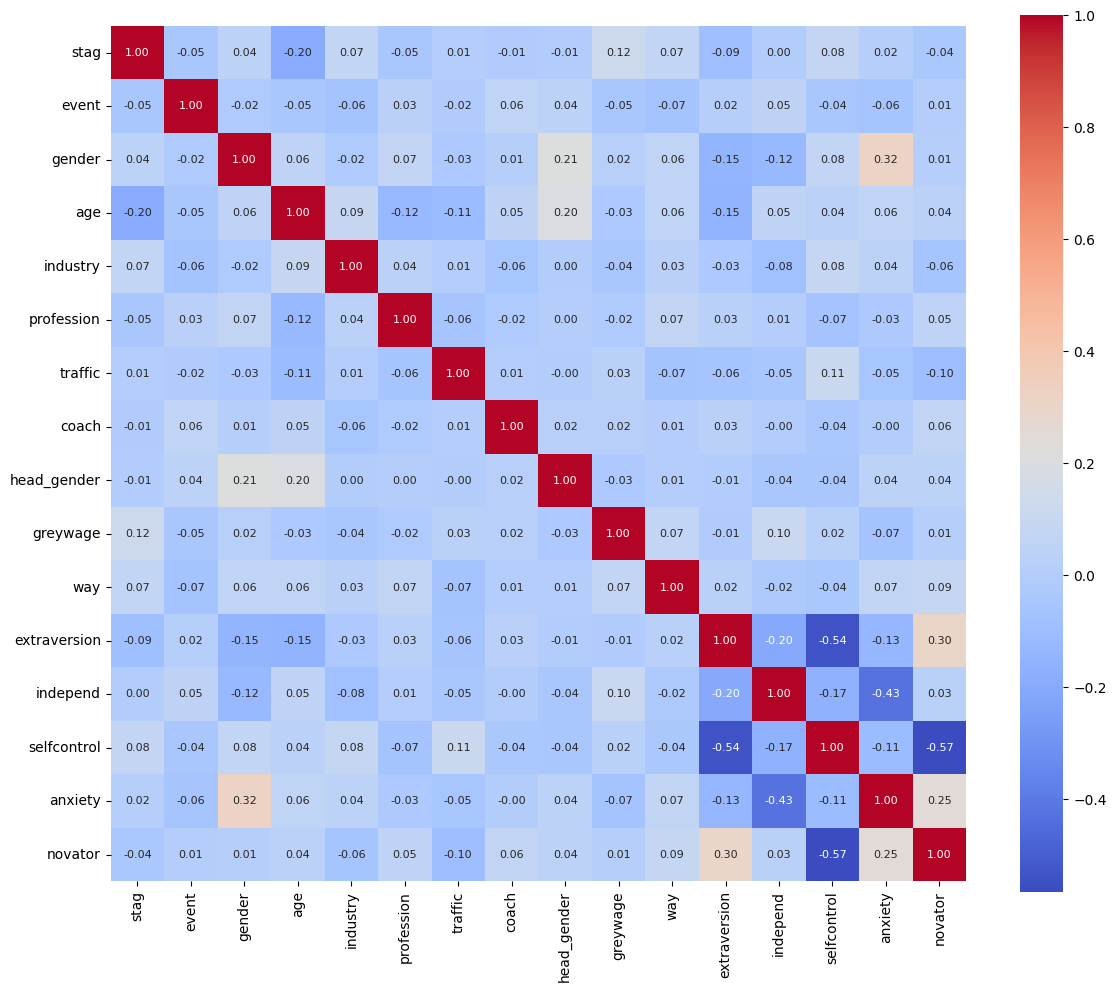

In [8]:
print(dataset.corr())

plt.figure(figsize=(12, 10))
sns.heatmap(
    dataset.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    annot_kws={"size": 8},
)
plt.tight_layout()
plt.show()

# Dataset Features Graphical Analysis

### Age of the Employees

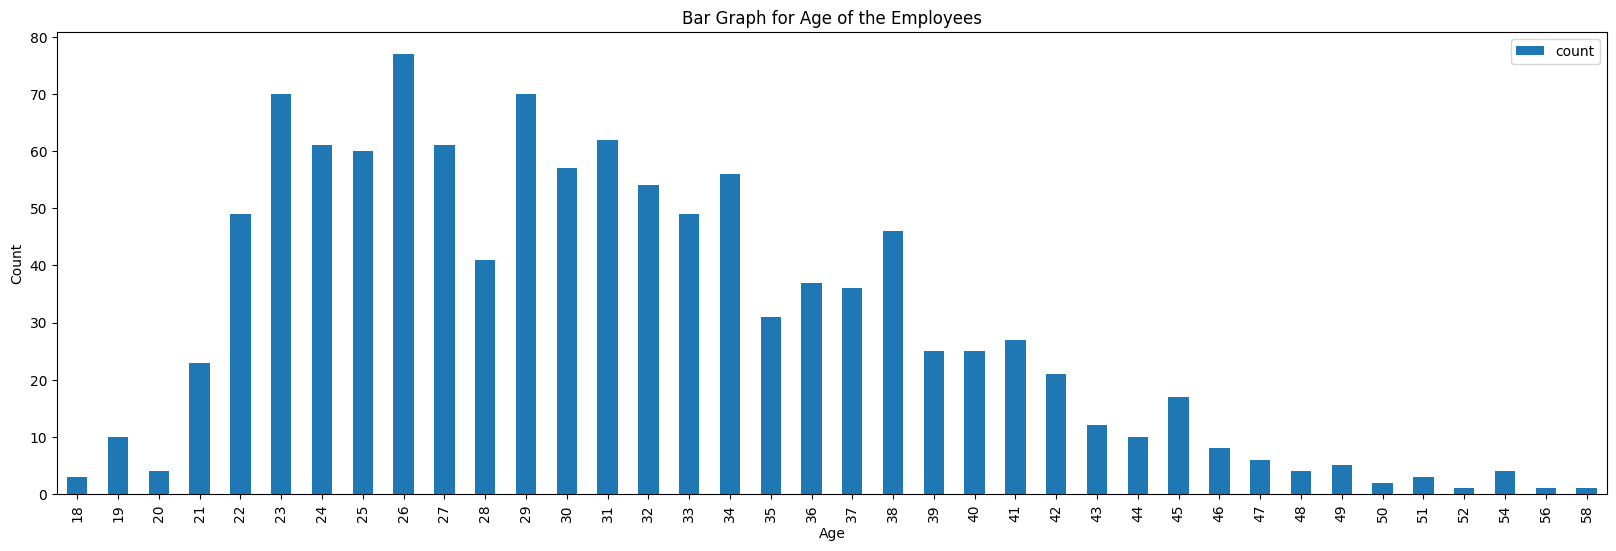

In [9]:
age_distribution = dataset["age"].value_counts().sort_index()
plt.figure(figsize=(20, 6))
age_distribution.plot(kind="bar", legend=True)
plt.title("Bar Graph for Age of the Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Anxiety Distribution of Employees

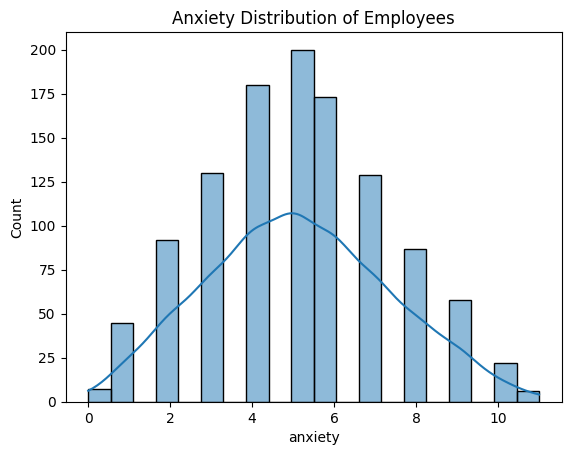

In [10]:
# Sleep Hours distribution
sns.histplot(dataset["anxiety"], bins=20, kde=True)
plt.title("Anxiety Distribution of Employees")
plt.show()

### Employee Churn by Experience

C:\Users\dheer\AppData\Local\Temp\ipykernel_106676\1388801195.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employees = (plotData.groupby("stag")["event"].value_counts(normalize=True))


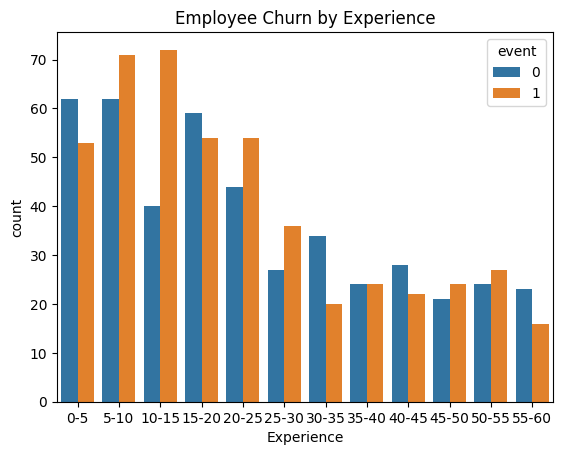

In [11]:
plotData = dataset.copy()
plotData["stag"] = pd.cut(
    dataset["stag"],
    bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
    labels=["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60"],
)
employees = (plotData.groupby("stag")["event"].value_counts(normalize=True))
sns.countplot(x="stag", hue="event", data=plotData)
plt.title("Employee Churn by Experience")
plt.xlabel("Experience")
plt.show()

### Piechart of Gender of the Employees

C:\Users\dheer\AppData\Local\Temp\ipykernel_106676\2220476542.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = ["Male (" + str(g_counts[0]) + ")","Female (" + str(g_counts[1]) + ")"]


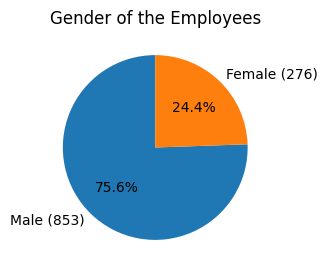

In [12]:
g_counts = (
    dataset["gender"]
    .map({0: "m", 1: "f"})
    .value_counts()
)
plt.figure(figsize=(3, 3))
labels = ["Male (" + str(g_counts[0]) + ")","Female (" + str(g_counts[1]) + ")"]
plt.pie(g_counts, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Gender of the Employees")
plt.show()

# Split Dataset into Training and Testing Data

In [13]:
column = dataset.pop("event")
dataset["event"] = column
x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1], test_size=0.2, random_state=1)

# Feature Scaling using Normalization (Min-Max)

In [14]:
columns = [
    "stag",
    "age",
    "extraversion",
    "independ",
    "selfcontrol",
    "anxiety",
    "novator"
]

minMaxScalerObj = MinMaxScaler()

# Fit into train data
x_train[columns] = minMaxScalerObj.fit_transform(x_train[columns])

# Fit into test data
x_test[columns] = minMaxScalerObj.transform(
    x_test[columns]
) 

display(dataset)

,stag,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,event
0,7.03080,1,35,2,6,4,1,0,1,0,7,5,6,7,10,1
1,22.96510,1,33,2,6,2,1,1,1,0,7,5,6,7,10,1
2,15.93430,0,35,8,6,4,1,1,1,0,7,8,2,4,10,1
3,15.93430,0,35,8,6,4,1,1,1,0,6,10,5,1,8,1
4,8.41068,1,32,10,2,7,2,0,1,0,3,5,9,7,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.61190,0,41,2,6,4,0,1,1,0,10,4,2,4,10,0
1125,10.61190,0,41,2,6,4,0,1,1,0,10,4,2,4,10,0
1126,118.80100,0,34,12,0,0,1,0,1,0,5,7,8,6,4,0
1127,49.41270,0,51,4,6,2,1,1,0,0,4,10,6,6,6,0


# Random Forest


Random Forest Algorithm :
Accuracy :  0.7079646017699115
Precision :  0.6727272727272727
Recall :  0.7115384615384616
F1 Score:  0.6915887850467289

Confusion Matrix : 
 [[86 36]
 [30 74]]


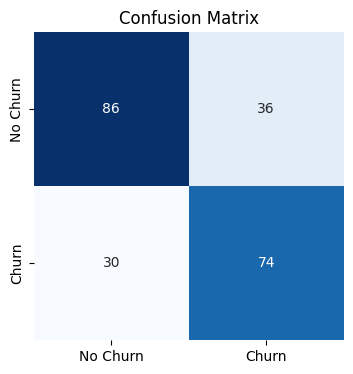

ROC-AUC :  0.7898013871374527


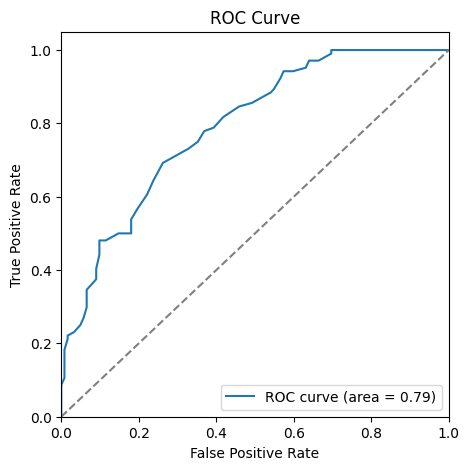

In [15]:
# Training model
print("\nRandom Forest Algorithm :")
rfClassifier = RandomForestClassifier()
rfClassifier.fit(x_train, y_train)
randomForestOutput = rfClassifier.predict(x_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, randomForestOutput)
rf_precision = precision_score(y_test, randomForestOutput)
rf_recall = recall_score(y_test, randomForestOutput)
rf_f1 = f1_score(y_test, randomForestOutput)
print("Accuracy : ", rf_accuracy)
print("Precision : ", rf_precision)
print("Recall : ", rf_recall)
print("F1 Score: ", rf_f1)

# Confusion Matrix
rf_confusion_Matrix = confusion_matrix(y_test, randomForestOutput)
print("\nConfusion Matrix : \n", rf_confusion_Matrix)
plt.figure(figsize=(4, 4))
sns.heatmap(
    rf_confusion_Matrix,
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"],
    cmap="Blues",
    cbar=False,
    fmt="d",
    annot=True,
)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
rfc_probs = rfClassifier.predict_proba(x_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, rfc_probs)
roc_auc = auc(fpr, tpr)
print("ROC-AUC : ", roc_auc)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [16]:
# Training model
print("\nLogistic Regression :")
lrAlg = LogisticRegression(max_iter=500)
lrAlg.fit(x_train, y_train)
lrOutput = lrAlg.predict(x_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lrOutput)
lr_precision = precision_score(y_test, randomForestOutput)
lr_recall = recall_score(y_test, randomForestOutput)
lr_f1 = f1_score(y_test, randomForestOutput)
print("Accuracy : ", lr_accuracy)
print("Precision : ", lr_precision)
print("Recall : ", lr_recall)
print("F1 Score: ", lr_f1)

# Confusion Matrix
print("\nConfusion Matrix : \n", confusion_matrix(y_test, lrOutput))

# ROC Curve
lr_probs = lrAlg.predict_proba(x_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
print("ROC-AUC : ", roc_auc)
print("\n\n")



Logistic Regression :
Accuracy :  0.5442477876106194
Precision :  0.6727272727272727
Recall :  0.7115384615384616
F1 Score:  0.6915887850467289

Confusion Matrix : 
 [[53 69]
 [34 70]]
ROC-AUC :  0.5988335435056746





# Decision Tree

In [17]:
# Training model
print("\nDecision Tree Algorithm :")
dtAlg = DecisionTreeClassifier()
dtAlg.fit(x_train, y_train)
dtOutput = dtAlg.predict(x_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dtOutput)
dt_precision = precision_score(y_test, randomForestOutput)
dt_recall = recall_score(y_test, randomForestOutput)
dt_f1 = f1_score(y_test, randomForestOutput)
print("Accuracy : ", dt_accuracy)
print("Precision : ", dt_precision)
print("Recall : ", dt_recall)
print("F1 Score: ", dt_f1)

# Confusion Matrix
print("\nConfusion Matrix : \n", confusion_matrix(y_test, dtOutput))

# ROC Curve
dt_probs = dtAlg.predict_proba(x_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, dt_probs)
roc_auc = auc(fpr, tpr)
print("ROC-AUC : ", roc_auc)
print("\n\n")


Decision Tree Algorithm :
Accuracy :  0.6902654867256637
Precision :  0.6727272727272727
Recall :  0.7115384615384616
F1 Score:  0.6915887850467289

Confusion Matrix : 
 [[81 41]
 [29 75]]
ROC-AUC :  0.6925441361916771





# XGBoost

In [18]:
# Training model
print("\nXG Boost Algorithm :")

from xgboost import XGBClassifier

xgbAlg = XGBClassifier()
xgbAlg.fit(x_train, y_train)
xgbOutput = xgbAlg.predict(x_test)

# Evaluate the model
xg_accuracy = accuracy_score(y_test, xgbOutput)
xg_precision = precision_score(y_test, randomForestOutput)
xg_recall = recall_score(y_test, randomForestOutput)
xg_f1 = f1_score(y_test, randomForestOutput)
print("Accuracy : ", xg_accuracy)
print("Precision : ", xg_precision)
print("Recall : ", xg_recall)
print("F1 Score: ", xg_f1)

# Confusion Matrix
print("\nConfusion Matrix : \n", confusion_matrix(y_test, xgbOutput))

# ROC Curve
xgb_probs = xgbAlg.predict_proba(x_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, xgb_probs)
roc_auc = auc(fpr, tpr)
print("ROC-AUC : ", roc_auc)
print("\n\n")


XG Boost Algorithm :
Accuracy :  0.6504424778761062
Precision :  0.6727272727272727
Recall :  0.7115384615384616
F1 Score:  0.6915887850467289

Confusion Matrix : 
 [[80 42]
 [37 67]]
ROC-AUC :  0.7269073139974778





# Most Important Columns in the Dataset using XGBoost Algorithm

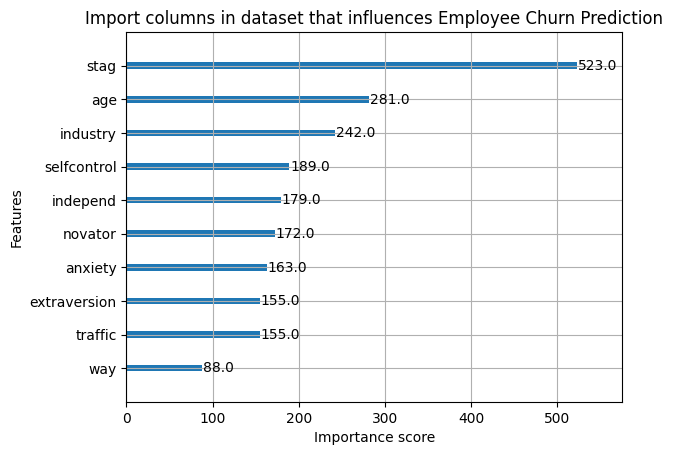

In [19]:
import xgboost

xgboost.plot_importance(xgbAlg, importance_type="weight", max_num_features=10)
plt.title("Import columns in dataset that influences Employee Churn Prediction")
plt.show()

In [ ]:
# Algorithm Accuracy Visual Comparision
accuracies = {
    "Random Forest": rf_accuracy,
    "Decision Tree": dt_accuracy,
    "Logistic Regression": lr_accuracy,
    "XGBoost": xg_accuracy,
}

sorted_model_accuracy = dict(
    sorted(accuracies.items(), key=lambda item: item[1], reverse=True)
)

models = list(sorted_model_accuracy.keys())
accuracy = list(sorted_model_accuracy.values())

plt.figure(figsize=(10, 6))
plt.barh(models, accuracy, color="#4CAF50")
plt.xlabel("Accuracy")
plt.title("Employee Churn Prediction | Model Accuracy Comparison")
plt.gca().invert_yaxis()
plt.show()

NameError: name 'xgb_accuracy' is not defined

# Save Performance Metrics to Database

In [ ]:
per_metrics = { 
    "dataset_name": "turnover.csv",
    "metrics": [
        {
            "model_name": "Random Forest",
            "accuracy": rf_accuracy,
            "precisions": rf_precision,
            "recall": rf_recall,
            "f1": rf_f1,
        },
        {
            "model_name": "Decision Tree",
            "accuracy": dt_accuracy,
            "precisions": dt_precision,
            "recall": dt_recall,
            "f1": dt_f1,
        },
        {
            "model_name": "Logistic Regression",
            "accuracy": lr_accuracy,
            "precisions": lr_precision,
            "recall": lr_recall,
            "f1": lr_f1,
        },
        {
            "model_name": "XGBoost",
            "accuracy": xg_accuracy,
            "precisions": xg_precision,
            "recall": xg_recall,
            "f1": xg_f1,
        }
    ],
}

db = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="employee_churn"
)

cursor = db.cursor()
columns = "dataset_name, model_name, accuracy, precisions, recall, f1"
holder = ("%s, %s, %s, %s, %s, %s")
table = "performance_metrics"
query = "INSERT INTO " + table + " ("+ columns + ") VALUES ("+ holder + ")"
print(query)
try:
    for item in per_metrics["metrics"]:
        values = (per_metrics["dataset_name"], ) + tuple(item[mKey]  for mKey in item.keys())
        print(values)
        cursor.execute(query, values)

    db.commit()
    print("Data inserted successfully")

except Error as e:
    print("Error inserting rows : ", e)

cursor.close()
db.close()

INSERT INTO performance_metrics (dataset_name, model_name, accuracy, precisions, recall, f1) VALUES (%s, %s, %s, %s, %s, %s)
('turnover.csv', 'Random Forest', 0.6902654867256637, 0.6440677966101694, 0.7307692307692307, 0.6846846846846847)
('turnover.csv', 'Decision Tree', 0.6460176991150443, 0.6440677966101694, 0.7307692307692307, 0.6846846846846847)
('turnover.csv', 'Logistic Regression', 0.5442477876106194, 0.6440677966101694, 0.7307692307692307, 0.6846846846846847)
('turnover.csv', 'XGBoost', 0.6504424778761062, 0.6440677966101694, 0.7307692307692307, 0.6846846846846847)
Data inserted successfully
